In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
movies_final_csv = "../data/movies_final.csv"

In [83]:
movies_final_df = pd.read_csv(movies_final_csv)
movies_final_df.head()
#movies_final_df.columns

,genres,movie_id,budget,title,popularity,release_date,revenue,ROI,Director
0,Animation,862,30000000,Toy Story,21.946943,10/30/1995,373554033,1145.18011,John Lasseter
1,Comedy,862,30000000,Toy Story,21.946943,10/30/1995,373554033,1145.18011,John Lasseter
2,Family,862,30000000,Toy Story,21.946943,10/30/1995,373554033,1145.18011,John Lasseter
3,Adventure,8844,65000000,Jumanji,17.015539,12/15/1995,262797249,304.30346,Joe Johnston
4,Fantasy,8844,65000000,Jumanji,17.015539,12/15/1995,262797249,304.30346,Joe Johnston


In [5]:
### Plot for top Genres by ROI
genresByROI = pd.DataFrame({'Count' : movies_final_df[["genres"]].copy().groupby("genres").size()})
genresByROI.head()
genresByROI['Average ROI'] = movies_final_df[['genres','ROI']].copy().groupby('genres')['ROI'].mean()
genresByROI = genresByROI.reset_index()
genresByROI

,genres,Count,Average ROI
0,Action,1403,470.952174
1,Adventure,959,576.422006
2,Animation,293,577.203143
3,Comedy,1817,384.098260
4,Crime,852,385.895644
5,Documentary,56,1536.151919
6,Drama,2547,398.689533
7,Family,533,438.762039
8,Fantasy,511,496.783416
9,Foreign,29,161.144814


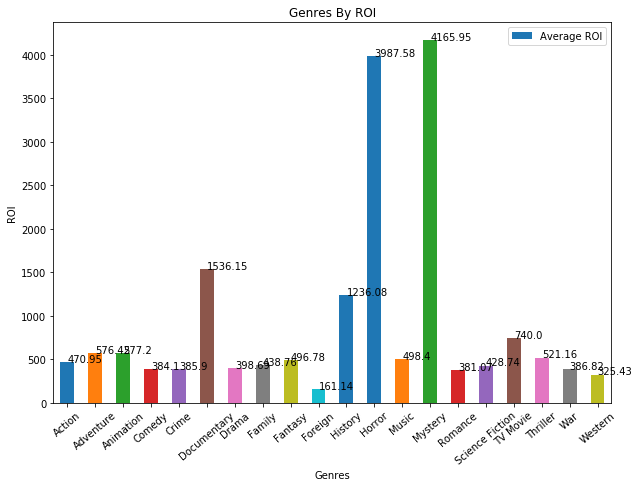

In [14]:
##Plot

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

genresByROI.plot.bar(x = 'genres', y = 'Average ROI', rot = 40, ax = ax)

for p in ax.patches:
   ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
plt.xlabel('Genres')
plt.ylabel('ROI')
plt.title('Genres By ROI')
plt.savefig('genresByROI.png')
plt.show()


In [18]:
#### Plot for top Genres by Popularity
genresByPopularity = pd.DataFrame({'Count' : movies_final_df[["genres"]].copy().groupby("genres").size()})
genresByPopularity.head()
genresByPopularity['Average Popularity'] = movies_final_df[['genres','popularity']].copy().groupby('genres')['popularity'].mean()
genresByPopularity = genresByPopularity.reset_index()
genresByPopularity
genresByPopularity.to_csv('../data/genresByPopularity.csv', index=False)

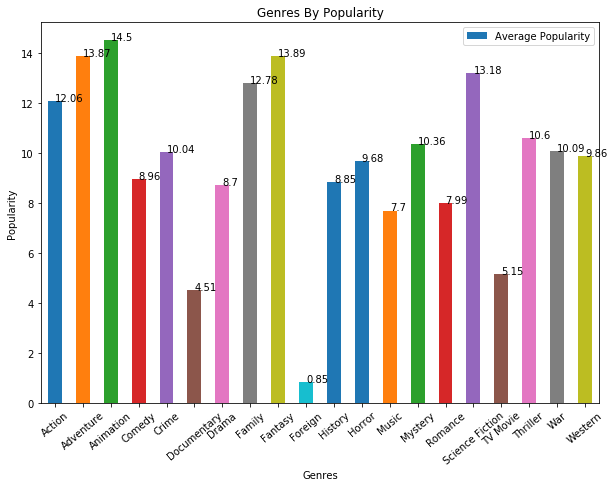

In [17]:
##Plot Genres By Popularity

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

genresByPopularity.plot.bar(x = 'genres', y = 'Average Popularity', rot = 40, ax = ax)

for p in ax.patches:
   ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Genres By Popularity')
plt.savefig('genresByPopularity.png')
plt.show()


In [35]:
topDirectorsbyROI = movies_final_df.groupby(["genres","Director"]).mean()["ROI"]
topDirectorsbyROI=topDirectorsbyROI.to_frame()
topDirectorsbyROI=topDirectorsbyROI.reset_index()

type(topDirectorsbyROI)
topDirectorsbyROI.columns
topDirectorsbyROI
#type(topDirectorsbyROI)

,genres,Director,ROI
0,Action,Yeon Sang-Ho,-75.852971
1,Action,A.R. Murugadoss,417.763278
2,Action,Aaron Norris,-15.104883
3,Action,Abhinay Deo,340.953545
4,Action,Abrid Shine,733.333333
5,Action,Adam McKay,70.432927
6,Action,Adam Rifkin,-69.194888
7,Action,Adam Shankman,101.798000
8,Action,Adam Wingard,-52.656780
9,Action,Afonso Poyart,-18.978200


In [22]:
director_name = input("Enter Director Name")

Enter Director NameChristopher Nolan


In [23]:
#Returns the movies by director
moviesBydirector = movies_final_df[(movies_final_df.Director == director_name)]
moviesBydirector= moviesBydirector.groupby(["genres"]).mean()["ROI"]
moviesBydirector

genres
Action             352.458849
Adventure          362.560812
Crime              356.339761
Drama              362.532004
History            419.876949
Mystery            269.680660
Science Fiction    362.560812
Thriller           372.951641
War                419.876949
Name: ROI, dtype: float64

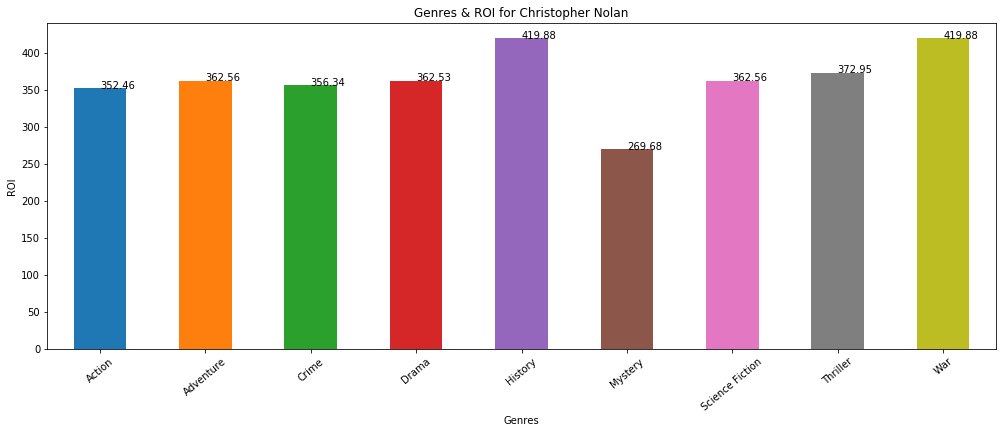

<Figure size 432x288 with 0 Axes>

In [24]:
fig=plt.figure(figsize=(17,6))
ax = fig.add_subplot(111)

moviesBydirector.plot.bar(x = 'genres', y = ['ROI'], rot = 40, ax = ax)

for p in ax.patches:
   ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

plt.xlabel('Genres')
plt.ylabel('ROI')
plt.title(f'Genres & ROI for {director_name}')
plt.show()
plt.savefig('MovieByJamesCameron.png')

In [13]:

##getting a reduced dataset based on top ROIs
topGenresByROI = topDirectorsbyROI.groupby(["genres"])["ROI"].mean()
topGenresByROI=topGenresByROI.to_frame()
#topGenresByROI.set_index('genres')
topGenresByROI
topGenresByROI = topGenresByROI.sort_values('ROI',ascending = False)

topGenresByROI = topGenresByROI.reset_index().head(5)
topGenresByROI
#topGenresByROI.columns
#type(topGenresByROI)


,genres,ROI
0,Mystery,5509.250899
1,Horror,5029.913232
2,Documentary,1682.697481
3,History,1513.853548
4,TV Movie,740.000000


In [65]:
#x=topDirectorsbyROI.join(topGenresByROI, on='genres',lsuffix='_Sorted', rsuffix='_orginal', how='inner', sort=True)
#movieSortROISortedtop=movieSortROItop3.join(topGenresByROI, on='genres',lsuffix='_Sorted', rsuffix='_orginal', how='inner', sort=True)
topDirectorsInTopGenre=pd.merge(topGenresByROI, topDirectorsbyROI, on='genres', how='inner')
topDirectorsInTopGenre=topDirectorsInTopGenre.reset_index()
topDirectorsInTopGenre

,index,genres,ROI_x,Director,ROI_y
0,0,Mystery,5509.250899,A.R. Murugadoss,735.164835
1,1,Mystery,5509.250899,Adam Wingard,-52.656780
2,2,Mystery,5509.250899,Adrian Lyne,1095.307763
3,3,Mystery,5509.250899,Agnieszka Wojtowicz-Vosloo,-19.857889
4,4,Mystery,5509.250899,Akira Kurosawa,-61.372800
5,5,Mystery,5509.250899,Akiva Goldsman,-48.666282
6,6,Mystery,5509.250899,Alan J. Pakula,497.598719
7,7,Mystery,5509.250899,Alan Parker,1.091953
8,8,Mystery,5509.250899,Albert Hughes,113.023186
9,9,Mystery,5509.250899,Alberto Rodríguez,29.243875


NameError: name 'x' is not defined

In [67]:
#topDirectorsInTopGenre = topDirectorsInTopGenre.groupby(['genres', 'Director'], sort = True).mean()['ROI_y']
#topDirectorsInTopGenre
new = topDirectorsInTopGenre[['genres', 'Director', 'ROI_y']]
#topDirectorsInTopGenreSorted = new.groupby(['genres','Director'], sort = True).mean()['ROI_y']
#topDirectorsInTopGenreSorted = topDirectorsInTopGenreSorted.to_frame()
#topDirectorsInTopGenreSorted = topDirectorsInTopGenreSorted.reset_index()
#topDirectorsInTopGenreSorted
topDirectorsInTopGenre = new.sort_values('ROI_y',ascending = False).groupby('genres').head(3)
topDirectorsInTopGenre

,genres,Director,ROI_y
628,Horror,Oren Peli,1.288939e+06
214,Mystery,Oren Peli,1.288939e+06
57,Mystery,Daniel Myrick,4.132333e+05
397,Horror,Daniel Myrick,4.132333e+05
913,History,Park Hoon-Jung,2.215690e+05
414,Horror,David Lynch,6.990000e+04
783,Documentary,Morgan Spurlock,4.386166e+04
43,Mystery,Charles B. Pierce,2.190000e+04
828,History,D.W. Griffith,1.090000e+04
761,Documentary,Henry Joost,1.005314e+04


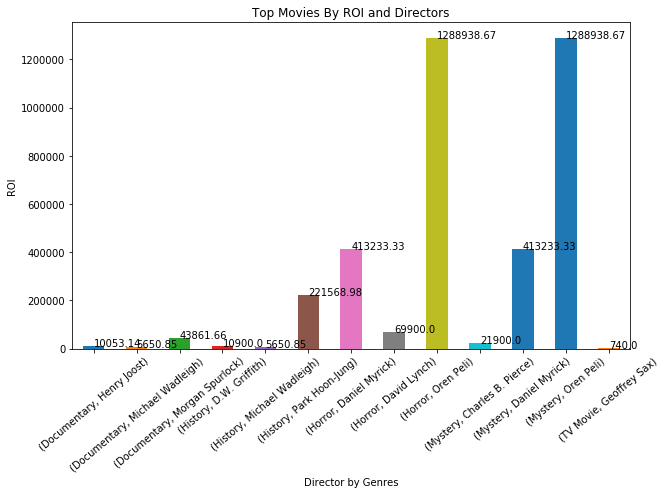

In [78]:
topDirectorsInTopGenrePlot = topDirectorsInTopGenre.groupby(['genres', 'Director'], sort = True).mean()['ROI_y']

#topDirectorsInTopGenrePlot=topDirectorsInTopGenrePlot.to_frame()
#topDirectorsInTopGenrePlot=topDirectorsInTopGenrePlot.reset_index()
#type(topDirectorsInTopGenrePlot)
#topDirectorsInTopGenrePlot
#
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

topDirectorsInTopGenrePlot.plot.bar(x = 'genres', y = ['Director', 'ROI_y'], rot = 40, ax = ax)

for p in ax.patches:
   ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

plt.xlabel('Director by Genres')
plt.ylabel('ROI')
plt.title('Top Movies By ROI and Directors')
plt.savefig('TopMoviesByROIandDirectors.png')
plt.show()



In [79]:
#1. Top movie by ROI ever. Paranormal Activity	1288938.667


#movies_final_df
topmoviebyROI=movies_final_df.groupby(['title']).mean()['ROI']
topmoviebyROI=topmoviebyROI.to_frame()
topmoviebyROI.reset_index()
type(topmoviebyROI)
topmoviebyROI
#topmoviebyROIdf=pd.DataFrame({'title':title,'ROI':ROI})
#topmoviebyROI=topmoviebyROI.groupby(['title'])['ROI'].max()
topmoviebyROI = topmoviebyROI.sort_values('ROI',ascending = False)
topmoviebyROI.head(1)

,ROI
title,
Paranormal Activity,1288938.667


In [80]:
#2. Top box office collection movie ever


topBoxofficeMovie=movies_final_df.groupby(['title']).mean()['revenue']
topBoxofficeMovie=topBoxofficeMovie.to_frame()
topBoxofficeMovie.reset_index()
type(topBoxofficeMovie)
topBoxofficeMovie
topBoxofficeMovie = topBoxofficeMovie.sort_values('revenue',ascending = False)
topBoxofficeMovie.head(1)

,revenue
title,
Avatar,2.787965e+09


In [81]:
#3. Best movie by popularity

topMovieByPopularity=movies_final_df.groupby(['title']).mean()['popularity']
topMovieByPopularity=topMovieByPopularity.to_frame()
topMovieByPopularity.reset_index()
type(topMovieByPopularity)
topMovieByPopularity
topMovieByPopularity = topMovieByPopularity.sort_values('popularity',ascending = False)
topMovieByPopularity.head(1)


,popularity
title,
Minions,547.488298


In [82]:
#3. Best director by popularity

topDirectorByPopularity=movies_final_df.groupby(['Director']).mean()['popularity']
topDirectorByPopularity=topDirectorByPopularity.to_frame()
topDirectorByPopularity.reset_index()
type(topDirectorByPopularity)
topDirectorByPopularity
topDirectorByPopularity = topDirectorByPopularity.sort_values('popularity',ascending = False)
topDirectorByPopularity.head(10)

,popularity
Director,
Kyle Balda,217.135416
Tim Miller,187.860492
Patty Jenkins,179.477832
Chris Williams,125.730355
Chad Stahelski,103.096653
James Gunn,92.612768
Bill Condon,77.159356
Joachim Rønning,76.561326
Wes Ball,69.795466


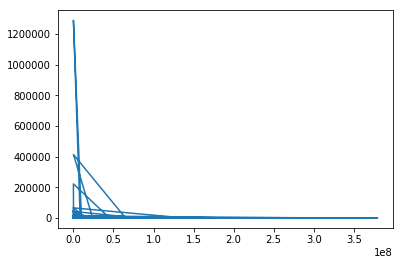

In [84]:
#Line plot for BUDGET Vs ROI

x = movies_final_df['budget']
y = movies_final_df['ROI']
plt.plot(x, y)
plt.xlabel('Budget')
plt.ylabel('ROI')
plt.title('Top Movies By ROI and Directors')
plt.savefig('TopMoviesByROIandDirectors.png')
plt.show()